In [65]:
import seaborn as sns
%matplotlib inline

In [97]:
# sns.set_theme()
sns.set_theme(style="ticks", font_scale=1.25)


In [67]:
tips = sns.load_dataset("tips")


In [68]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


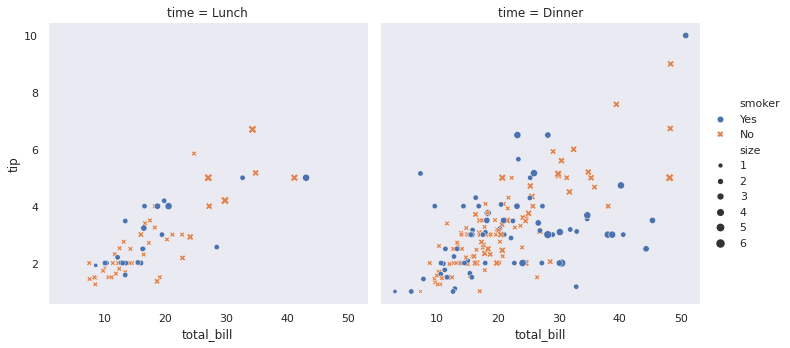

In [96]:

sns.relplot(
    data = tips,
    x = "total_bill", y="tip", col="time",
    hue = "smoker", style="smoker", size="size",
)

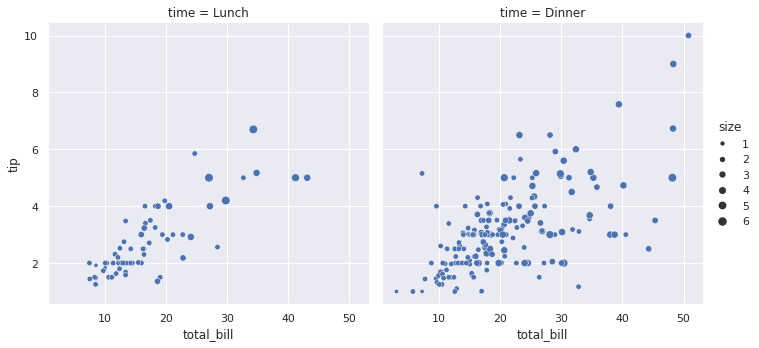

In [70]:
sns.relplot(
    data = tips,
    x = "total_bill", y="tip", 
    col="time", size="size"
)

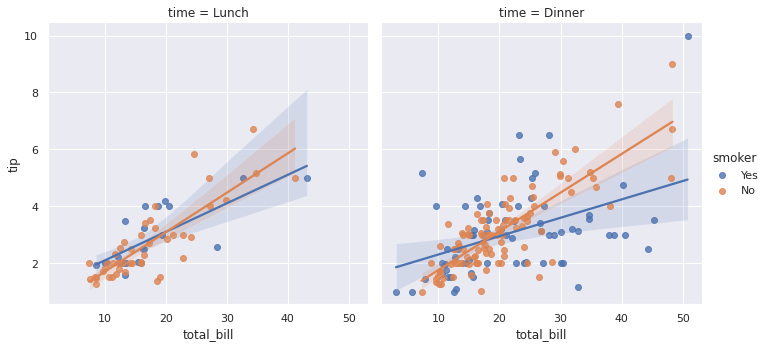

In [71]:
sns.lmplot(data=tips, 
           x="total_bill", 
           y="tip", 
           col="time", 
           hue="smoker")

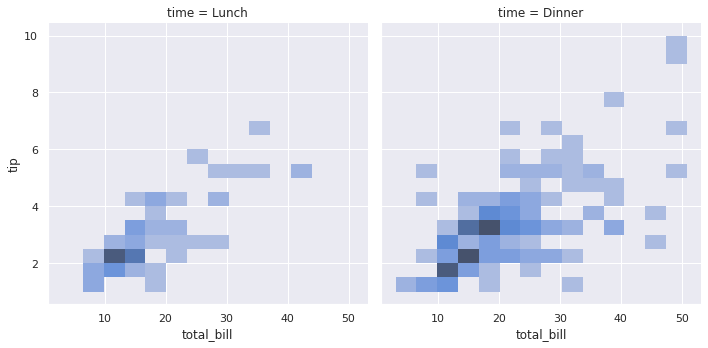

In [72]:
sns.displot(data=tips, 
            x="total_bill", y="tip",
            col="time", )

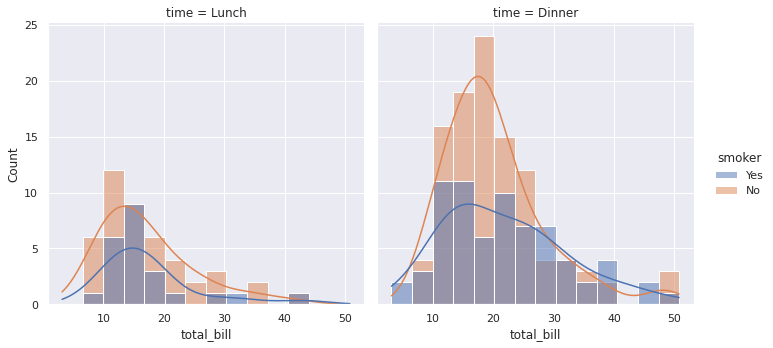

In [73]:
sns.displot(data=tips, 
            x="total_bill",kde=True,hue="smoker",
            kind="hist",
            col="time", )

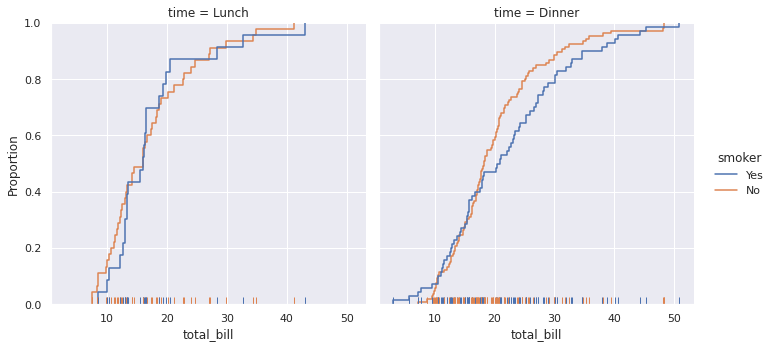

In [74]:
sns.displot(
    data=tips,
    kind="ecdf",
    x="total_bill",
    col="time",
    hue="smoker",
    rug=True
    
)

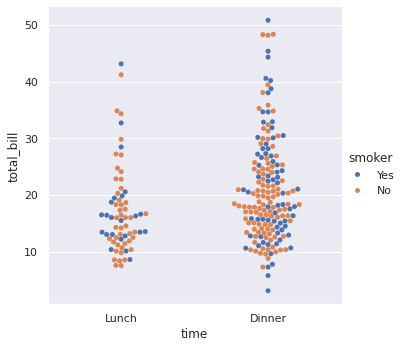

In [75]:
sns.catplot(data=tips, 
            kind="swarm",
            x="time", 
            y="total_bill", 
            hue="smoker"
)


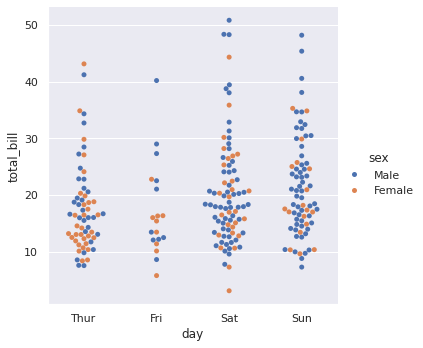

In [76]:
sns.catplot(data=tips, 
            kind="swarm",
            x="day", 
            y="total_bill", 
            hue="sex"
)


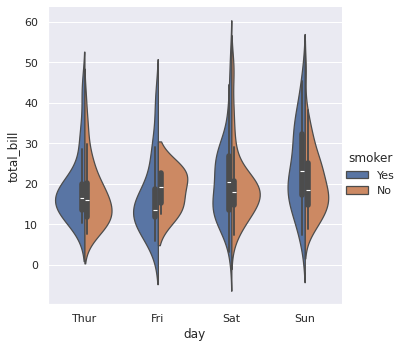

In [77]:
sns.catplot(data=tips, 
            kind="violin", 
            x="day", 
            y="total_bill", 
            hue="smoker", 
            split=True
)


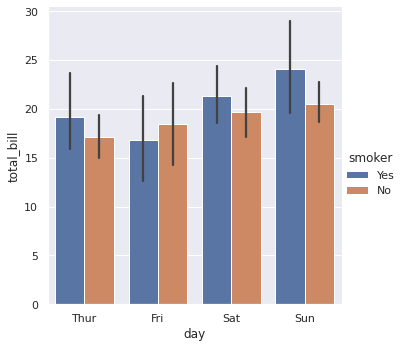

In [78]:
sns.catplot(data=tips,
            kind="bar", 
            x="day", 
            y="total_bill",
            hue="smoker")

In [79]:
dots = sns.load_dataset("dots")

In [80]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


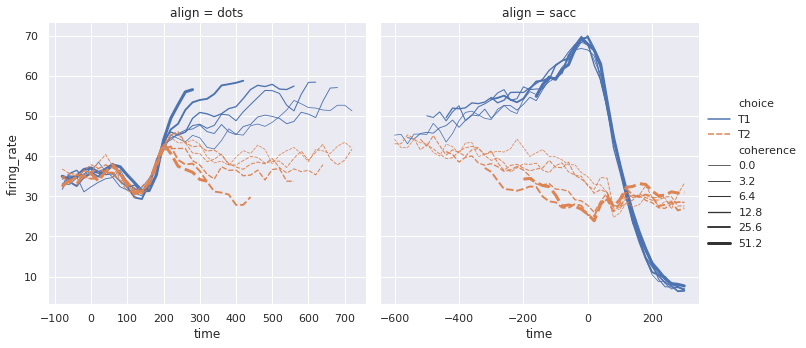

In [81]:

sns.relplot(
    data = dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False)
)

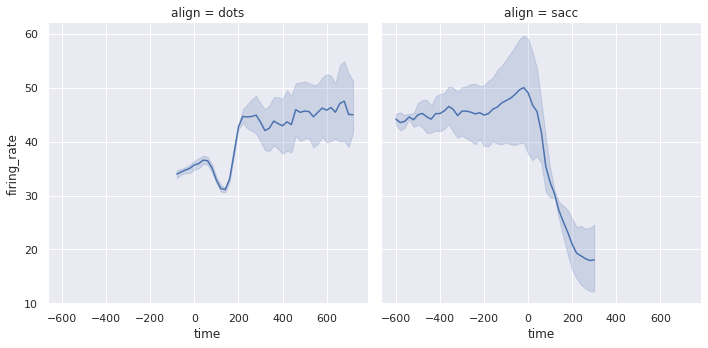

In [82]:
sns.relplot(
    data = dots, kind="line",
    x="time", y="firing_rate", col="align",
   
)

In [83]:
fmri = sns.load_dataset("fmri")

In [84]:

fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


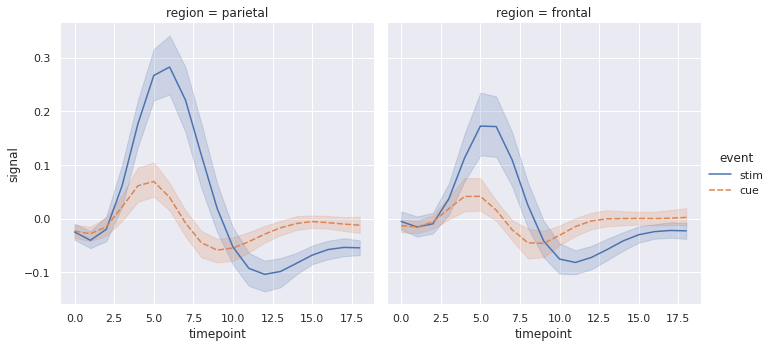

In [85]:

sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event"
)

# Joint plot

In [86]:
penguins = sns.load_dataset("penguins")

In [87]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


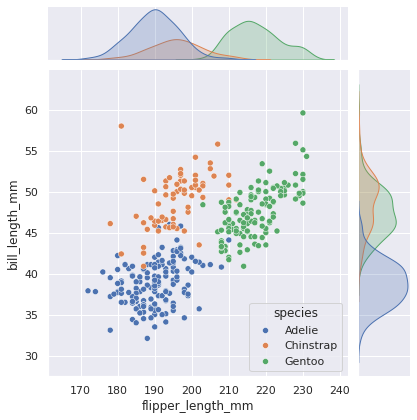

In [88]:
sns.jointplot(
    data=penguins,
    x="flipper_length_mm",
    y="bill_length_mm",
    hue="species"
)

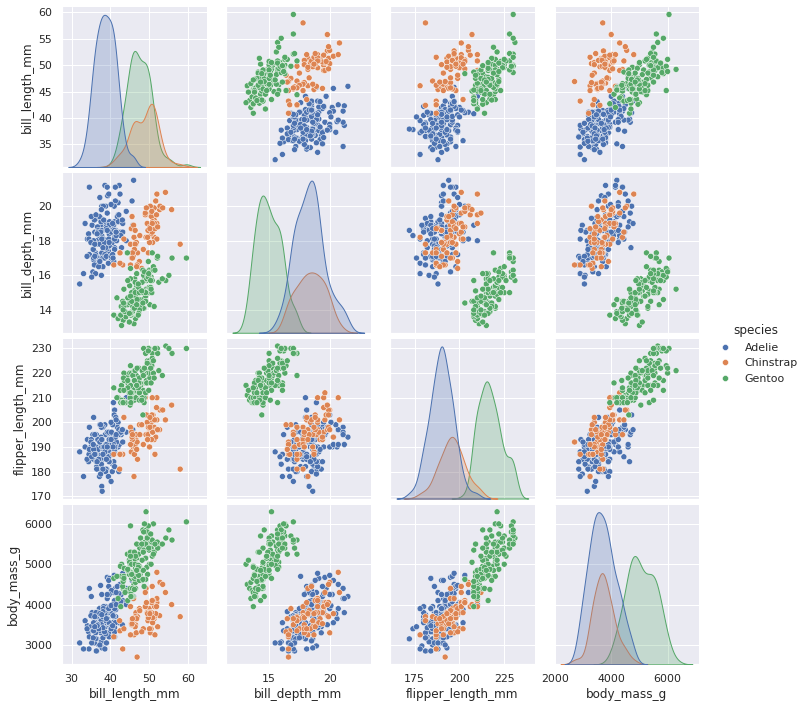

In [89]:
sns.pairplot(data=penguins, hue="species")

# lower_level tools 

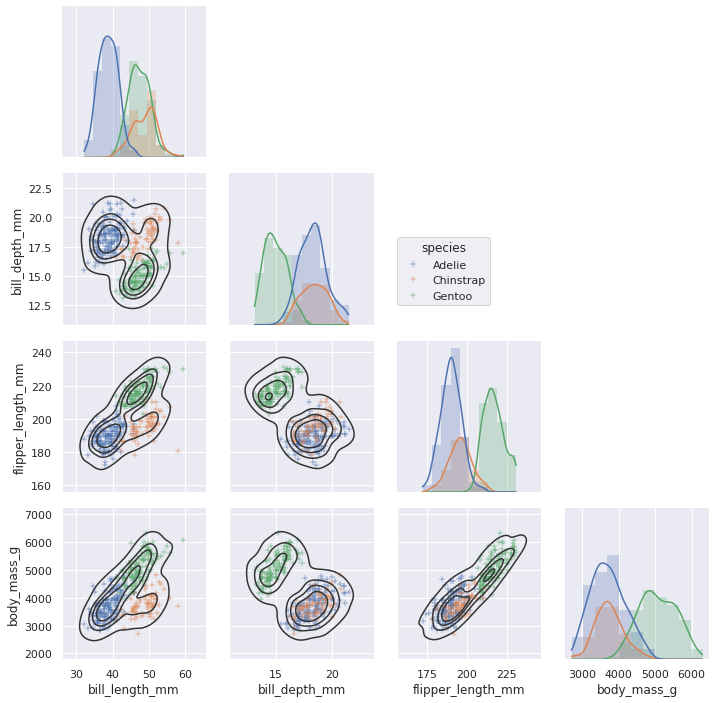

In [90]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

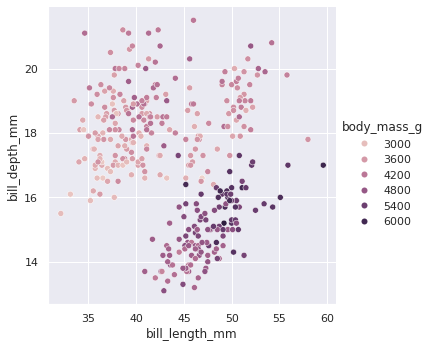

In [91]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

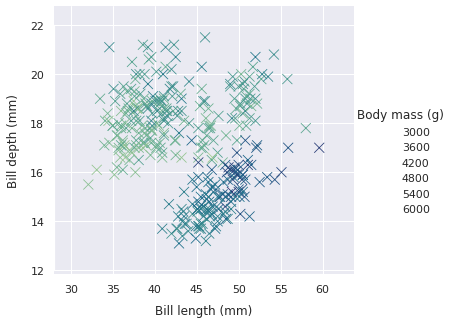

In [92]:
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

# Example Gallery

<Axes: >

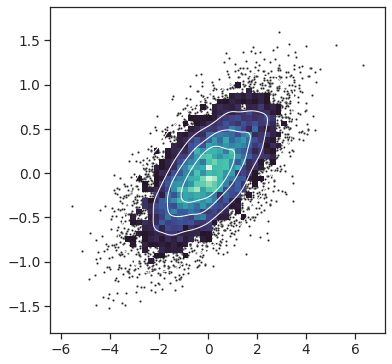

In [98]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)